# Necessary Library Installs

In [93]:
%pip install scipy
%pip install pandas
%pip install seaborn
%pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Imports

In [94]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load data from experiments

In [112]:
storage_size_file_path = "./data/recorded_storage_sizes.csv"
exec_times_file_path = "./data/recorded_exec_times.csv" 

translations_dict = {
    "original": "Original",
    "optimized": "Otimização"
}

storage_df = pd.read_csv(storage_size_file_path)
storage_df['total_size_in_mb_treated'] = storage_df['total_size_in_mb'].str[:-3].astype(int)
storage_df['Tratamentos'] = storage_df['comment']
storage_df = storage_df.replace({"Tratamentos": translations_dict})

exec_times_df = pd.read_csv(exec_times_file_path)
exec_times_df['query_execution_time'] = pd.to_timedelta(exec_times_df['query_execution_time'])
exec_times_df['query_execution_time_seconds'] = exec_times_df['query_execution_time'].dt.total_seconds()
exec_times_df['Tratamentos'] = exec_times_df['comment']
exec_times_df = exec_times_df.replace({"Tratamentos": translations_dict})

In [113]:
def check_statistic_difference(df: pd.DataFrame):
    # segment datasets between original and optimized
    original = df[df['comment'] == 'original']['query_execution_time_seconds']
    optimized = df[df['comment'] == 'optimized']['query_execution_time_seconds']
    
    # Define Hypothesis
    null_h = "The groups are the same statistically."
    alt_h = "The groups are different statistically."

    # Define the statistical significance level
    alpha = 0.05

    # Perform the Mann-Whitney U test
    result = stats.mannwhitneyu(original, optimized)

    statistic = result.statistic
    p_value = result.pvalue

    print("p_value:", p_value)

    if p_value < alpha:
        print("Null Hypothesis rejected.")
        print("verdict:", alt_h)
    else:
        print("Failed to reject Null Hypothesis")
        print("verdict:", null_h)

In [114]:
fluxograma_df = exec_times_df[exec_times_df['modulo'] == 'fluxograma']
corregedoria_df = exec_times_df[exec_times_df['modulo'] == 'corregedoria']

# Perform tests to fluxograma and corregedoria

In [115]:
print("Statistical analysis for fluxograma:")
check_statistic_difference(fluxograma_df)
print("")

print("Statistical analysis for corregedoria:")
check_statistic_difference(corregedoria_df)
print("")

Statistical analysis for fluxograma:
p_value: 5.044739930247448e-34
Null Hypothesis rejected.
verdict: The groups are different statistically.

Statistical analysis for corregedoria:
p_value: 3.9939242464420235e-34
Null Hypothesis rejected.
verdict: The groups are different statistically.



# Density Plot do fluxograma

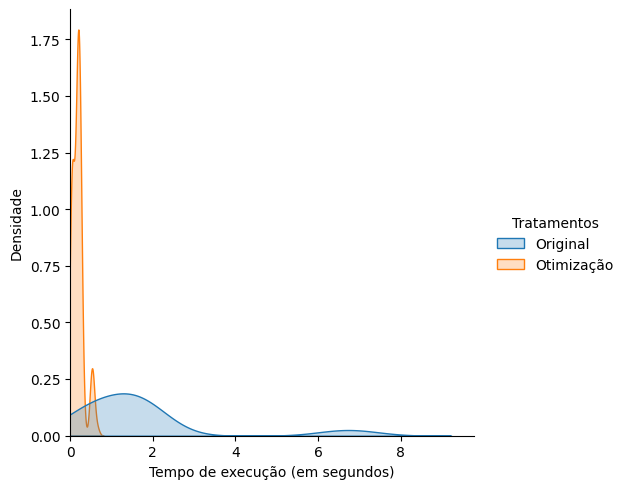

In [116]:
# Density Plot of the execution times
fig_1 = sns.displot(fluxograma_df, x="query_execution_time_seconds", kind="kde", fill=True, hue="Tratamentos")
fig_1.set(xlim=(0))
fig_1.set_axis_labels("Tempo de execução (em segundos)", "Densidade")

# Density Plot da corregedoria

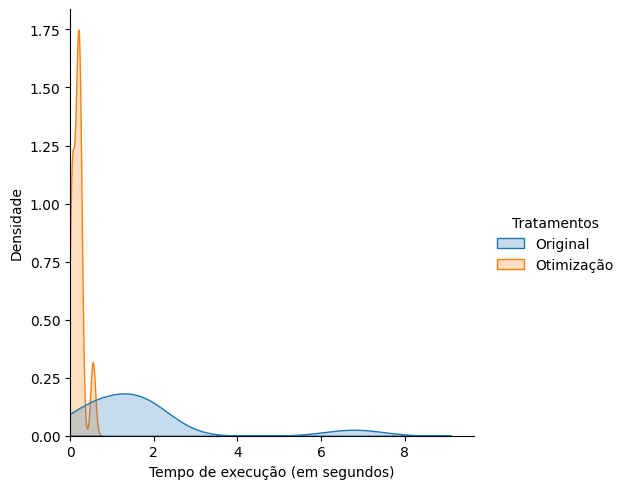

In [117]:
# Density Plot of the execution times
fig_2 = sns.displot(corregedoria_df, x="query_execution_time_seconds", kind="kde", fill=True, hue="Tratamentos")
fig_2.set(xlim=(0))
fig_2.set_axis_labels("Tempo de execução (em segundos)", "Densidade")

# Barplot of storage size

[Text(0.5, 0, 'Unidades Jurídicas'),
 Text(0, 0.5, 'Custo para armazenar a unidade em MB')]

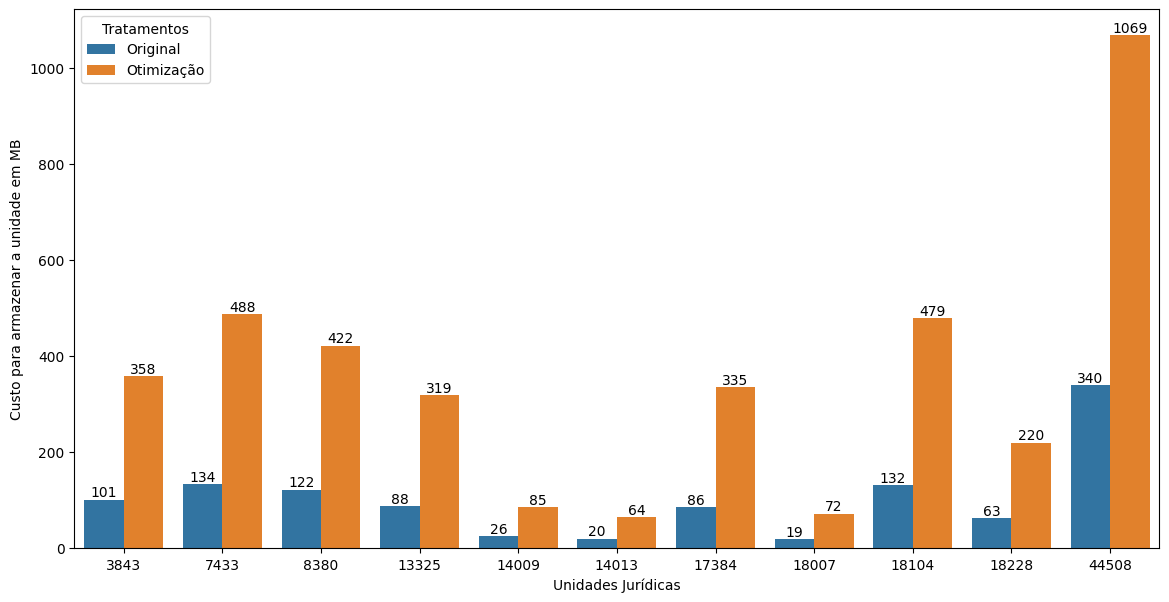

In [118]:
plt.figure(figsize = (14, 7))
fig_3 = sns.barplot(storage_df, x='unidade', y='total_size_in_mb_treated', hue='Tratamentos')
for i in fig_3.containers:
    fig_3.bar_label(i,)
fig_3.set(xlabel='Unidades Jurídicas', ylabel='Custo para armazenar a unidade em MB')